In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# KNN (MNIST)

The wikipedia entry for MNIST is shown below, it is a classic dataset for machine learning. In this case we will investigate the digits classification problem with and without noise and using dimensional reduction with PCA and different numbers of PCs as features. It has many features and many samples (784, 60000) making it computationally intensive in some instances 

Additionally, human text recognition is a real problem that has real applications in some areas as mentioned below:

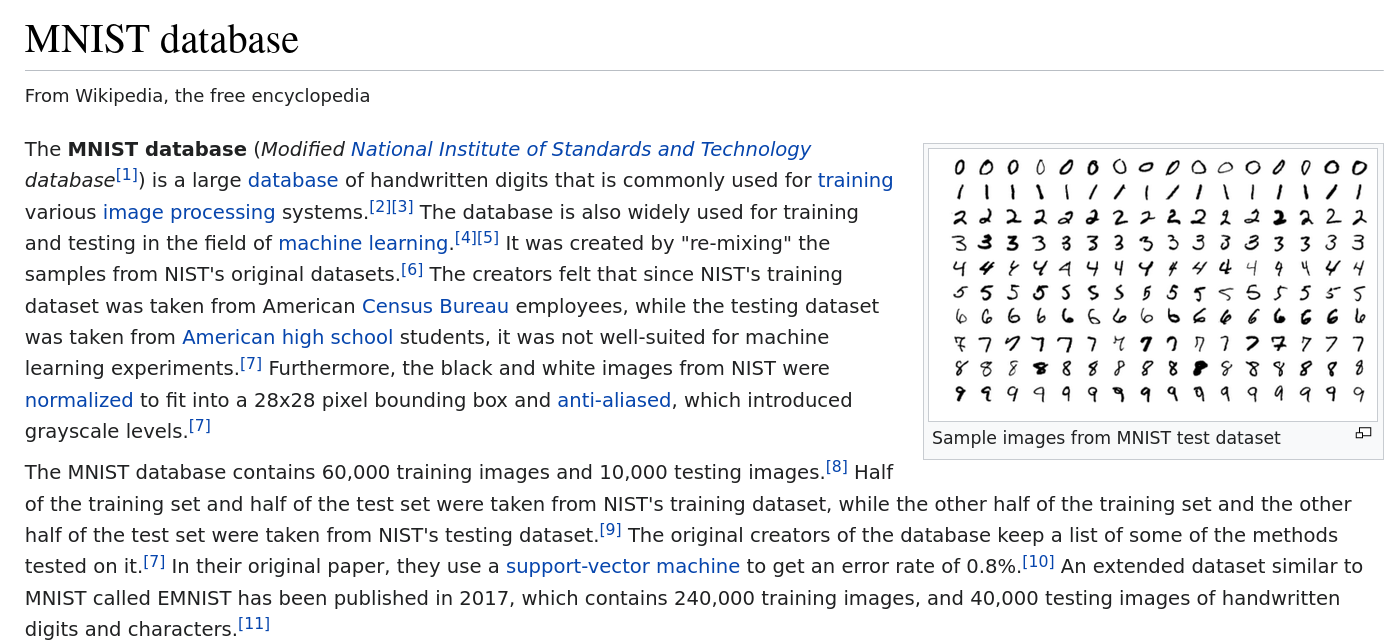

Original Question:

#### 2) Choose a KNN model for a multiclass classification using MNIST data. 

- a)    Do the same steps as the above question 1 with KNN (if you do not know how to do multiclass classification with KNN, search the web to find an example and use it)
- b)    Which step is difficult.
- c)    Which n_component works better for KNN
- d)    If you wanted to choose a model (KNN or Logistic regression), which one would you choose. Have a discussion (based on different metrics, including confusion matrix)and explain the pro and cons of each

## Load data and Initialize functions 

### Downloading the Data (MNIST)

Initialize my packages as well and the mnist dataset loader from keras

In [4]:
import numpy as np
from joblib import parallel_backend
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection as md
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import time

2022-02-16 13:53:19.038019: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


### Load the training and classification data as well as the functions I previously made

That way I can just have a simple loop again

In [5]:
# Load the mnist data
(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()

# I saved the functions that I defined in the first notebook into a python file
# Here I just import them they are dexcribed more completely in the previous notebook
from assignment_functions import add_noise_to_MNIST, return_classification_accuracy

## 2 a) Redo-ing the analysis from the previous notebook

## Look at the model performance without PCA

- a)    Do not use PCA. To make images noisy, use different c_noise. Choose a set n_noise = [0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50]. Train the model for each n_noise. Find corresponding accuracy (use, for example, metrics.accuracy_score(pred_va, tar_va)). Plot:  accouracy  vs. n_noise. 


#### I'll define a KNN classifier with n_neighbors = 10 and p = 2 somewhat arbitrarily

In [6]:
n_noise = [0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50]
n_pca = 0

# Empty lists for plotting
accuracies_tr_no_pca = []
accuracies_va_no_pca = []

# I want to use all of the training samples
n_tr = 60000

for c_noise in n_noise:
    
    # Return the accuracies for each noise this time using a
    # KNN classifier with n_neighbors = 10, p = 2
    ac_tr, ac_va, ti_tr = return_classification_accuracy(
        inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
        model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2
    )
    accuracies_tr_no_pca.append(ac_tr)
    accuracies_va_no_pca.append(ac_va)

Noise is 0, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 83.09237575531006 seconds

Noise is 0.25, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 83.96538281440735 seconds

Noise is 0.5, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 82.77363181114197 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 82.85280728340149 seconds

Noise is 1.5, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 79.15528845787048 seconds

Noise is 2, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 81.44152045249939 seconds

Noise is 3, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 85.89

#### The model is taking quite a bit of time,  the data is the right size indicating there is no PCA

## Plot the results

Save the results for later so that I can plot them without re-running the training

In [7]:
np.save('knn_accuracies_tr_no_pca',accuracies_tr_no_pca)
np.save('knn_accuracies_va_no_pca',accuracies_va_no_pca)

Text(0.5, 0, '(log scaled) Noise Level')

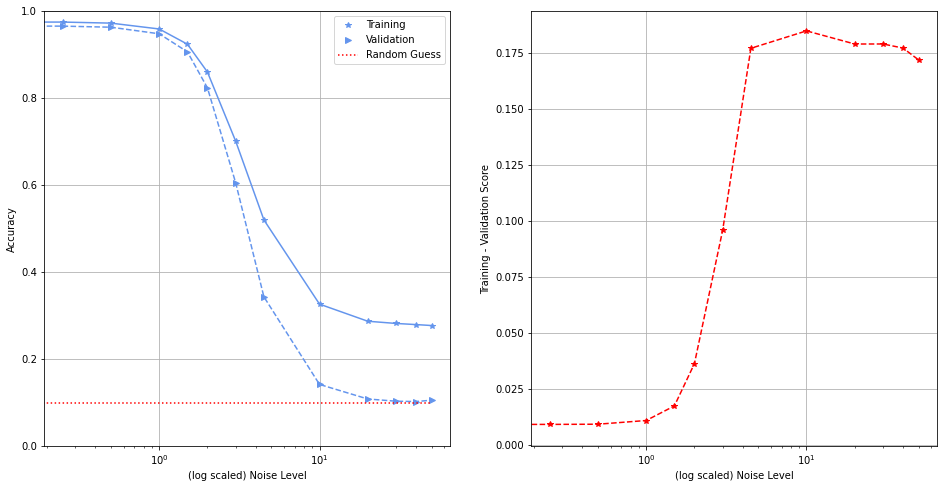

In [21]:
plt.figure(figsize=[16,8])
plt.subplot(121)
plt.semilogx(n_noise,accuracies_tr_no_pca,c='cornflowerblue')
plt.semilogx(n_noise,accuracies_tr_no_pca,'*',c='cornflowerblue',label='Training')
plt.semilogx(n_noise,accuracies_va_no_pca,'--',c='cornflowerblue')
plt.semilogx(n_noise,accuracies_va_no_pca,'>',c='cornflowerblue',label='Validation')
plt.semilogx([0,50],[0.1,0.1],'r:',label='Random Guess')
plt.ylabel('Accuracy')
plt.xlabel('(log scaled) Noise Level')
plt.ylim([0,1])
plt.legend()
plt.grid('on')
plt.subplot(122)
plt.semilogx(n_noise,np.array(accuracies_tr_no_pca) - accuracies_va_no_pca,'r--')
plt.semilogx(n_noise,np.array(accuracies_tr_no_pca) - accuracies_va_no_pca,'r*')
plt.grid('on')
plt.ylabel('Training - Validation Score')
plt.xlabel('(log scaled) Noise Level')

In [9]:
print(f'The validation accuracties without PCA were {accuracies_va_no_pca}')
print(f'The training accuracties without PCA were {np.array(accuracies_tr_no_pca).round(4)}')

The validation accuracties without PCA were [0.9665, 0.9655, 0.963, 0.9479, 0.9064, 0.8235, 0.6052, 0.343, 0.1416, 0.1081, 0.103, 0.1022, 0.1053]
The training accuracties without PCA were [0.975  0.9748 0.9724 0.959  0.924  0.8599 0.701  0.5199 0.3262 0.2869
 0.2818 0.2792 0.277 ]


#### Again, I plotted the accuracy for the training and validation sets in a log x axis to better visualize the scale of the data. The model performed quite well with an accuracy of 0.9665 and 0.975 without noise for validation and training respectively. The training accuracy was not marginally different for values up to a noise of 1 but decreased dramatically for values between one and five. Beyond ten the model plateaued as it approached a validation accuracy of 0.1 which is equivalent to a random guess. 

#### The difference in the training and validation scores increased more than exponentially with noise. Overfitting likely occurs when the data becomes less and less structured and the feature data contains less information to make true classifications by leading the model to train based off of random features in the data. Perhaps this could be combatted by adding more neighbors to the classifier. There is quite dramatic overfitting for all noise levels over 4.5.

## Look at the model performance with PCA=100

- b)    Do the same step above; however, use a fixed PCA (n_component=100) this time. Plot accuracy vs. n_noise on the same plot.

<!-- - c)    Do the same above with PCA (n_component=20).

- d)    Compare three curves and discuss/explain what you see in the plot. -->

In [10]:
# Set the variables 
n_pca = 100

# Make empty lists to store data
accuracies_tr_100_pca = []
accuracies_va_100_pca = []

# Run a loop over the noise levels
for c_noise in n_noise:
    
    # Return the classification scores
    ac_tr, ac_va, ti_tr = return_classification_accuracy(
        inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
        model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2
    )
    
    accuracies_tr_100_pca.append(ac_tr)
    accuracies_va_100_pca.append(ac_va)

Noise is 0, number of PCs is 100
Shape of the training, validation data ((60000, 100), (10000, 100))
The time taken was 63.13310384750366 seconds

Noise is 0.25, number of PCs is 100
Shape of the training, validation data ((60000, 100), (10000, 100))
The time taken was 62.84111928939819 seconds

Noise is 0.5, number of PCs is 100
Shape of the training, validation data ((60000, 100), (10000, 100))
The time taken was 62.91233420372009 seconds

Noise is 1, number of PCs is 100
Shape of the training, validation data ((60000, 100), (10000, 100))
The time taken was 63.39129829406738 seconds

Noise is 1.5, number of PCs is 100
Shape of the training, validation data ((60000, 100), (10000, 100))
The time taken was 64.91057562828064 seconds

Noise is 2, number of PCs is 100
Shape of the training, validation data ((60000, 100), (10000, 100))
The time taken was 60.01921582221985 seconds

Noise is 3, number of PCs is 100
Shape of the training, validation data ((60000, 100), (10000, 100))
The time t

#### The model was a bit quicker with only 100 PCs

## Plot the results

Save the results for later so that I can plot them without re-running the training

In [11]:
np.save('knn_accuracies_tr_100_pca',accuracies_tr_100_pca)
np.save('knn_accuracies_va_100_pca',accuracies_va_100_pca)

Text(0.5, 0, 'log scaled Noise Level')

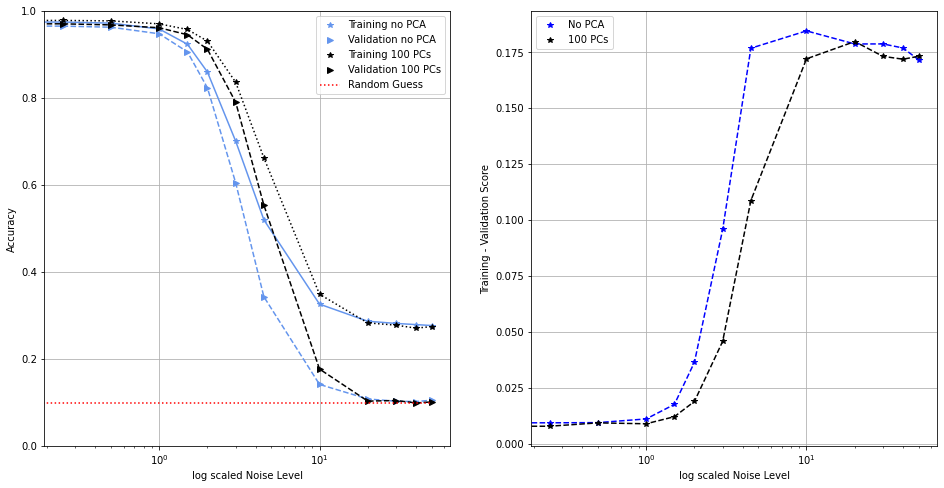

In [20]:
plt.figure(figsize=[16,8])
plt.subplot(121)
plt.semilogx(n_noise,accuracies_tr_no_pca,c='cornflowerblue')
plt.semilogx(n_noise,accuracies_tr_no_pca,'*',c='cornflowerblue',label='Training no PCA')
plt.semilogx(n_noise,accuracies_va_no_pca,'--',c='cornflowerblue')
plt.semilogx(n_noise,accuracies_va_no_pca,'>',c='cornflowerblue',label='Validation no PCA')
plt.semilogx(n_noise,accuracies_tr_100_pca,':',c='k')
plt.semilogx(n_noise,accuracies_tr_100_pca,'*',c='k',label='Training 100 PCs')
plt.semilogx(n_noise,accuracies_va_100_pca,'--',c='k')
plt.semilogx(n_noise,accuracies_va_100_pca,'>',c='k',label='Validation 100 PCs')
plt.semilogx([0,50],[0.1,0.1],'r:',label='Random Guess')
plt.ylabel('Accuracy')
plt.xlabel('(log scaled) Noise Level')
plt.ylim([0,1])
plt.legend()
plt.grid('on')
plt.subplot(122)
plt.semilogx(n_noise,np.array(accuracies_tr_no_pca) - accuracies_va_no_pca,'b--')
plt.semilogx(n_noise,np.array(accuracies_tr_no_pca) - accuracies_va_no_pca,'b*',label='No PCA')
plt.semilogx(n_noise,np.array(accuracies_tr_100_pca) - accuracies_va_100_pca,'k--')
plt.semilogx(n_noise,np.array(accuracies_tr_100_pca) - accuracies_va_100_pca,'k*',label='100 PCs')
plt.legend()
plt.grid('on')
plt.ylabel('Training - Validation Score')
plt.xlabel('(log scaled) Noise Level')

In [13]:
print(f'The validation accuracties with 100 PCs were {accuracies_va_100_pca}')
print(f'The training accuracties with 100 PCs were {np.array(accuracies_tr_100_pca).round(4)}')

The validation accuracties with 100 PCs were [0.9709, 0.9708, 0.9683, 0.9618, 0.9457, 0.9122, 0.7906, 0.5537, 0.1769, 0.1032, 0.1046, 0.099, 0.1013]
The training accuracties with 100 PCs were [0.9791 0.9786 0.9776 0.9707 0.9578 0.9311 0.8364 0.6625 0.3491 0.2831
 0.2778 0.271  0.2746]


#### The validation accuracy was marginally better even without noise for 100 PCs which surprised me with validation accuracy of 0.9709 as compared to 0.9665. Additionally the model was more robust to noise with much better performance and less overfitting at most noise levels but showing nearly twice the performance for a noise level of 4.5. This can be on the plot on the right where the 100 PCs (black line) has lower values especially between 1 and 10, showing decreased overfitting.

#### I would think that removing data from the model would lead to a worse classifier as was seen in the case of Logistic Regression. Perhaps the 5% of the variance contained in the discarded PCs corresponded to mostly noise to the KNN clasifier.

## Look at the model performance with PCA=20

<!-- - b)    Do the same step above; however, use a fixed PCA (n_component=100) this time. Plot accuracy vs. n_noise on the same plot. -->

- c)    Do the same above with PCA (n_component=20).

<!-- - d)    Compare three curves and discuss/explain what you see in the plot. -->

In [14]:
n_pca = 20

accuracies_tr_20_pca = []
accuracies_va_20_pca = []

for c_noise in n_noise:
    
    # Return the classification scores
    ac_tr, ac_va, ti_tr = return_classification_accuracy(
        inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
        model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2
    )
    accuracies_tr_20_pca.append(ac_tr)
    accuracies_va_20_pca.append(ac_va)

Noise is 0, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 60.48702549934387 seconds

Noise is 0.25, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 60.5730299949646 seconds

Noise is 0.5, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 60.10211634635925 seconds

Noise is 1, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 61.43841338157654 seconds

Noise is 1.5, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 64.04670858383179 seconds

Noise is 2, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 63.43488574028015 seconds

Noise is 3, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 59.7010703086

#### The model was not much quicker than for 100 PCs even though the data is much smaller.

## Plot the results

Save the results for later so that I can plot them without re-running the training

In [15]:
np.save('knn_accuracies_tr_20_pca',accuracies_tr_20_pca)
np.save('knn_accuracies_va_20_pca',accuracies_va_20_pca)

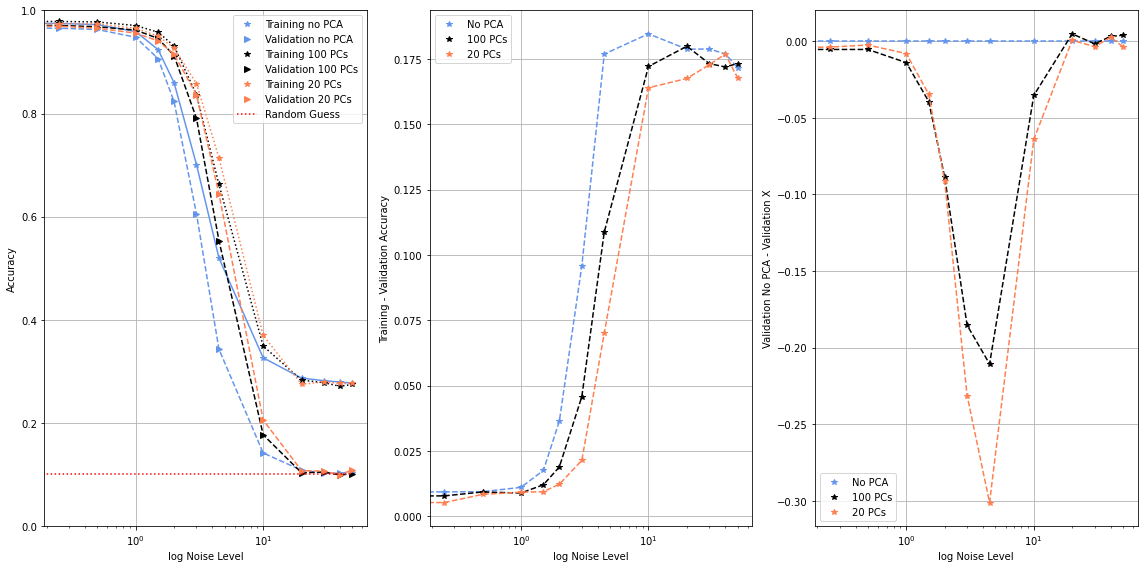

In [16]:
plt.figure(figsize=[16,8])
plt.subplot(131)
plt.semilogx(n_noise,accuracies_tr_no_pca,c='cornflowerblue')
plt.semilogx(n_noise,accuracies_tr_no_pca,'*',label='Training no PCA',c='cornflowerblue')
plt.semilogx(n_noise,accuracies_va_no_pca,'--',c='cornflowerblue')
plt.semilogx(n_noise,accuracies_va_no_pca,'>',label='Validation no PCA',c='cornflowerblue')
plt.semilogx(n_noise,accuracies_tr_100_pca,':',c='k')
plt.semilogx(n_noise,accuracies_tr_100_pca,'*',c='k',label='Training 100 PCs')
plt.semilogx(n_noise,accuracies_va_100_pca,'--',c='k')
plt.semilogx(n_noise,accuracies_va_100_pca,'>',c='k',label='Validation 100 PCs')
plt.semilogx(n_noise,accuracies_tr_20_pca,':',c='coral')
plt.semilogx(n_noise,accuracies_tr_20_pca,'*',c='coral',label='Training 20 PCs')
plt.semilogx(n_noise,accuracies_va_20_pca,'--',c='coral')
plt.semilogx(n_noise,accuracies_va_20_pca,'>',c='coral',label='Validation 20 PCs')
plt.semilogx([0,50],[0.1,0.1],'r:',label='Random Guess')
plt.ylabel('Accuracy')
plt.xlabel('log Noise Level')
plt.ylim([0,1])
plt.legend()
plt.grid('on')
plt.subplot(132)
plt.semilogx(n_noise,np.array(accuracies_tr_no_pca) - accuracies_va_no_pca,'--',c='cornflowerblue')
plt.semilogx(n_noise,np.array(accuracies_tr_no_pca) - accuracies_va_no_pca,'*',label='No PCA',c='cornflowerblue')
plt.semilogx(n_noise,np.array(accuracies_tr_100_pca) - accuracies_va_100_pca,'k--')
plt.semilogx(n_noise,np.array(accuracies_tr_100_pca) - accuracies_va_100_pca,'k*',label='100 PCs')
plt.semilogx(n_noise,np.array(accuracies_tr_20_pca) - accuracies_va_20_pca,'--',c='coral')
plt.semilogx(n_noise,np.array(accuracies_tr_20_pca) - accuracies_va_20_pca,'*',c='coral',label='20 PCs')
plt.legend()
plt.grid('on')
plt.ylabel('Training - Validation Accuracy')
plt.xlabel('log Noise Level')
plt.subplot(133)
plt.semilogx(n_noise,np.array(accuracies_va_no_pca) - accuracies_va_no_pca,'--',c='cornflowerblue')
plt.semilogx(n_noise,np.array(accuracies_va_no_pca) - accuracies_va_no_pca,'*',label='No PCA',c='cornflowerblue')
plt.semilogx(n_noise,np.array(accuracies_va_no_pca) - accuracies_va_100_pca,'k--')
plt.semilogx(n_noise,np.array(accuracies_va_no_pca) - accuracies_va_100_pca,'k*',label='100 PCs')
plt.semilogx(n_noise,np.array(accuracies_va_no_pca) - accuracies_va_20_pca,'--',c='coral')
plt.semilogx(n_noise,np.array(accuracies_va_no_pca) - accuracies_va_20_pca,'*',c='coral',label='20 PCs')
plt.grid('on')
plt.ylabel('Validation No PCA - Validation X')
plt.xlabel('log Noise Level')
plt.legend()
plt.tight_layout()

In [17]:
print(f'The validation accuracties with 20 PCs were {accuracies_va_20_pca}')
print(f'The training accuracties with 20 PCs were {np.array(accuracies_tr_20_pca).round(4)}')

The validation accuracties with 20 PCs were [0.9696, 0.9693, 0.9654, 0.9559, 0.9409, 0.9148, 0.8366, 0.6442, 0.2056, 0.1074, 0.1065, 0.0995, 0.1088]
The training accuracties with 20 PCs were [0.9748 0.9745 0.9738 0.9651 0.9503 0.9271 0.858  0.7143 0.3696 0.275
 0.2793 0.2764 0.2766]


#### The validation accuracy was roughly the same as without PCA and without noise with an accuracy for the validation set of 0.9696 as compared to 0.9665 for no PCA. This difference is likely not significant as the runs did not have the same exact noise. What did increase was the robustness of the model to noise with generally the least overfitting as seen in the middle plot above with training and validation sets showing the closest values generally (coral line for 20 PCs). 20 PCs also showed the highest score for the mid levels of noise much beter than even the 100 PCs (right). The 20 PC KNN showing accuracy 0.30 better than without PCA and the 100 PC case showing accuracy 0.21 better than without PCA as seen on the plot to the right.

## 2) b)

- b)    Which step is difficult.
<!-- c-    Which n_component works better for KNN
d-    If you wanted to choose a model (KNN or Logistic regression), which one would you choose. Have a discussion (based on different metrics, including confusion matrix)and explain the pro and cons of each -->

#### I'll time the output of one of a few smaller runs, to see how the number of training samples effects performance

In [41]:
## Run with 100 PCs
n_pca = 100

n_tr = 1000
# Return the classification scores
%time return_classification_accuracy(inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise, model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2)
n_tr = 2000
# Return the classification scores
%time return_classification_accuracy(inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise, model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2)
n_tr = 3000
# Return the classification scores
%time return_classification_accuracy(inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise, model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2)
n_tr = 10000
# Return the classification scores
%time return_classification_accuracy(inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise, model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2)

## Run without PCA
n_pca = 0
n_tr = 1000
# Return the classification scores
%time return_classification_accuracy(inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise, model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2)
n_tr = 2000
# Return the classification scores
%time return_classification_accuracy(inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise, model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2)
n_tr = 3000
# Return the classification scores
%time return_classification_accuracy(inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise, model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2)
n_tr = 10000
# Return the classification scores
%time return_classification_accuracy(inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise, model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=10,p=2)

Noise is 1, number of PCs is 100
Shape of the training, validation data ((1000, 100), (10000, 100))
The time taken was 0.6860318183898926 seconds

CPU times: user 4.82 s, sys: 1.56 s, total: 6.38 s
Wall time: 1.16 s
Noise is 1, number of PCs is 100
Shape of the training, validation data ((2000, 100), (10000, 100))
The time taken was 0.8761982917785645 seconds

CPU times: user 5.76 s, sys: 1.46 s, total: 7.21 s
Wall time: 1.56 s
Noise is 1, number of PCs is 100
Shape of the training, validation data ((3000, 100), (10000, 100))
The time taken was 1.1684105396270752 seconds

CPU times: user 6.92 s, sys: 2.32 s, total: 9.24 s
Wall time: 2.04 s
Noise is 1, number of PCs is 100
Shape of the training, validation data ((10000, 100), (10000, 100))
The time taken was 3.322169065475464 seconds

CPU times: user 14.2 s, sys: 4.27 s, total: 18.5 s
Wall time: 6.24 s
Noise is 1, number of PCs is 0
Shape of the training, validation data ((1000, 784), (10000, 784))
The time taken was 0.810819149017334 s

(0.9351, 0.9155, 4.515478610992432)

#### The most difficult part seems to be generally training the algorithm with large numbers of samples. There was a smaller dependence on the number of features increasing the time. The model also took longer with more components but this was not seen to have as much of an effect as the number of samples.

#### The heaviest step was generally training the KNN model with that step taking the longest as compared to the PCA which was always  quick as it is mostly matrix multiplication.

## 2) c)

<!-- - b)    Which step is difficult. -->
- c)    Which n_component works better for KNN
<!-- d-    If you wanted to choose a model (KNN or Logistic regression), which one would you choose. Have a discussion (based on different metrics, including confusion matrix)and explain the pro and cons of each -->

## Using the helper function from 1

First I'll check if the results correlate between the full dataset and a sixth of the dataset to speed up results and then use the smaller dataset to get results if they show the same trend.

In [17]:
# Full dataset different n_neighbors
n_components = [2, 10, 20]

n_pca = 0
n_tr = 60000
c_noise = 1

accuracies_tr_full = []
accuracies_va_full = []

for n_component in n_components:
    
    # Return the classification scores
    ac_tr, ac_va, ti_tr = return_classification_accuracy(
        inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
        model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=n_component,p=2
    )
    accuracies_tr_full.append(ac_tr)
    accuracies_va_full.append(ac_va)
    
# Partial dataset different n_neighbors
n_tr = 10000

accuracies_tr_part = []
accuracies_va_part = []

for n_component in n_components:
    
    # Return the classification scores
    ac_tr, ac_va, ti_tr = return_classification_accuracy(
        inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
        model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=n_component,p=2
    )
    accuracies_tr_part.append(ac_tr)
    accuracies_va_part.append(ac_va)

Noise is 1, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 67.48575901985168 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 89.13083362579346 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 84.86975836753845 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 3.672118902206421 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 4.516817569732666 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 4.497354745864868 seconds



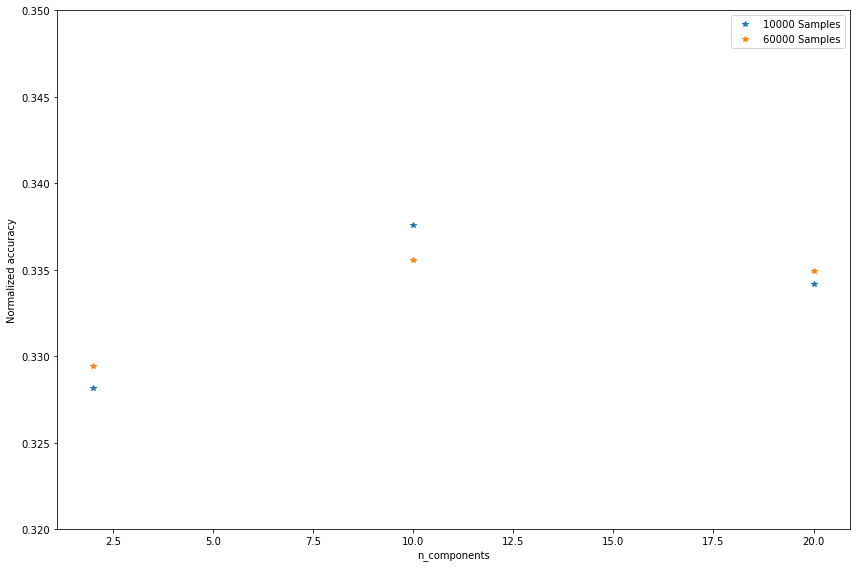

In [18]:
plt.figure(figsize=[12,8])
plt.plot(n_components,accuracies_va_part/np.sum(accuracies_va_part),'*',label='10000 Samples')
plt.plot(n_components,accuracies_va_full/np.sum(accuracies_va_full),'*',label='60000 Samples')
plt.ylim([0.32,0.35])
plt.ylabel('Normalized accuracy')
plt.xlabel('n_components')
plt.legend()
plt.tight_layout()

#### The accuracies between the two samples seem to correlate quite closely although the absolute accuracy for less samples is lower. However, what we care about is the relative accuracy which is seen above to shows a similar trend.

#### Thus to be more efficicent I will only use 10000 samples to find a good K

In [58]:
# Full dataset different n_neighbors
n_components = [1,2,3,5,8,13,21,34,55,89,144,233] # fibonacci scales well

n_tr = 10000

accuracies_tr_part = []
accuracies_va_part = []

for n_component in n_components:
    
    # Return the classification scores
    ac_tr, ac_va, ti_tr = return_classification_accuracy(
        inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
        model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=n_component,p=2
    )
    accuracies_tr_part.append(ac_tr)
    accuracies_va_part.append(ac_va)

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 3.449286699295044 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 3.605123519897461 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 3.7762413024902344 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 4.661734104156494 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 4.465773820877075 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 4.617628335952759 seconds

Noise is 1, number of PCs is 0
Shape of the training, validation data ((10000, 784), (10000, 784))
The time taken was 4.557121276

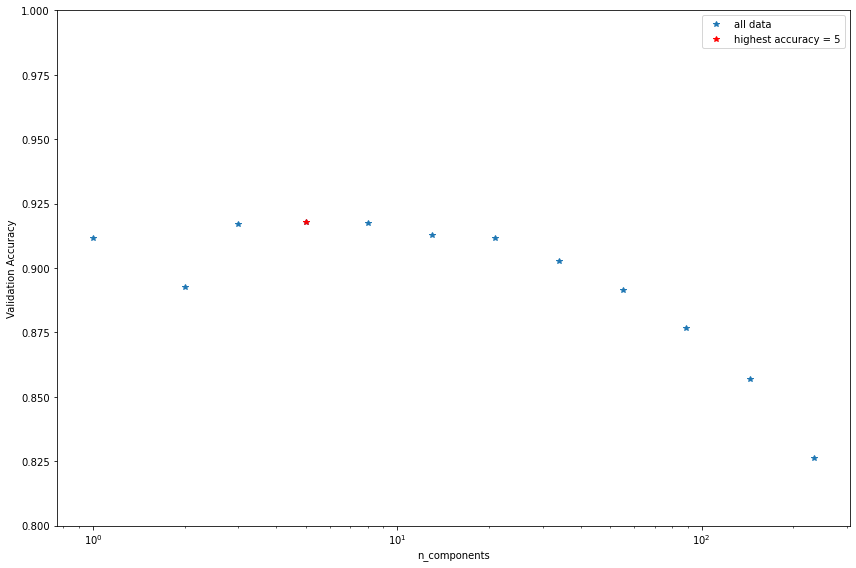

In [66]:
plt.figure(figsize=[12,8])
plt.semilogx(n_components,accuracies_va_part,'*',label='all data')
plt.semilogx(np.array(n_components)[np.argmax(accuracies_va_part)],np.max(accuracies_va_part),'r*',
             label=f'highest accuracy = {np.array(n_components)[np.argmax(accuracies_va_part)]}')
plt.ylim([0.8, 1])
plt.ylabel('Validation Accuracy')
plt.xlabel('n_components')
plt.legend()
plt.tight_layout()

#### The highest accuracy was for around 5 components with accuracy dropping past 10 and inconsistent results before 3 components.

#### There is one outlier at 2 where perhaps the algorithm didn't perform well but I think the trend is fairly clear in that the best accuracies are being found in the range between 5 and 15 with little difference in performance for that range.

## 2) d)

<!-- - b)    Which step is difficult. -->
<!-- - c)    Which n_component works better for KNN -->
- d)    If you wanted to choose a model (KNN or Logistic regression), which one would you choose. Have a discussion (based on different metrics, including confusion matrix)and explain the pro and cons of each

#### The choice between the two models was highly dependent on the noise in the data. The KNN performed to a higher validation accuracy (0.9709) without noise and with 100 PCs whereas the Logistic regression had a highest validation accuracy of 0.9258 without noise and with no PCA leading to a difference of 0.045 in accuracy which is quite significant.

#### When noise was involved the Logistic regression started to see better results for higher noise levels, a more in depth discussion will be seen below.

In [83]:
#Load in the accuracies
from glob import glob

knn_accuracies = []
LR_accuracies = []

knn_labels = []
LR_labels = []

# Load in the files by finding them with glob
for file_knn, file_LR in zip(sorted(glob('knn_accuracies*')),sorted(glob('accuracies*'))):
    # Append files to array
    knn_accuracies.append(np.load(file_knn))
    LR_accuracies.append(np.load(file_LR))
    print(file_knn, file_LR)
    
    # Append file names as labels
    LR_labels.append(file_LR.split('.')[0])
    knn_labels.append(file_knn.split('.')[0])

knn_accuracies_tr_100_pca.npy accuracies_tr_100_pca.npy
knn_accuracies_tr_20_pca.npy accuracies_tr_20_pca.npy
knn_accuracies_tr_no_pca.npy accuracies_tr_no_pca.npy
knn_accuracies_va_100_pca.npy accuracies_va_100_pca.npy
knn_accuracies_va_20_pca.npy accuracies_va_20_pca.npy
knn_accuracies_va_no_pca.npy accuracies_va_no_pca.npy


### Now that I have loaded the accuracies I will plot them

I will plot the absolute and difference

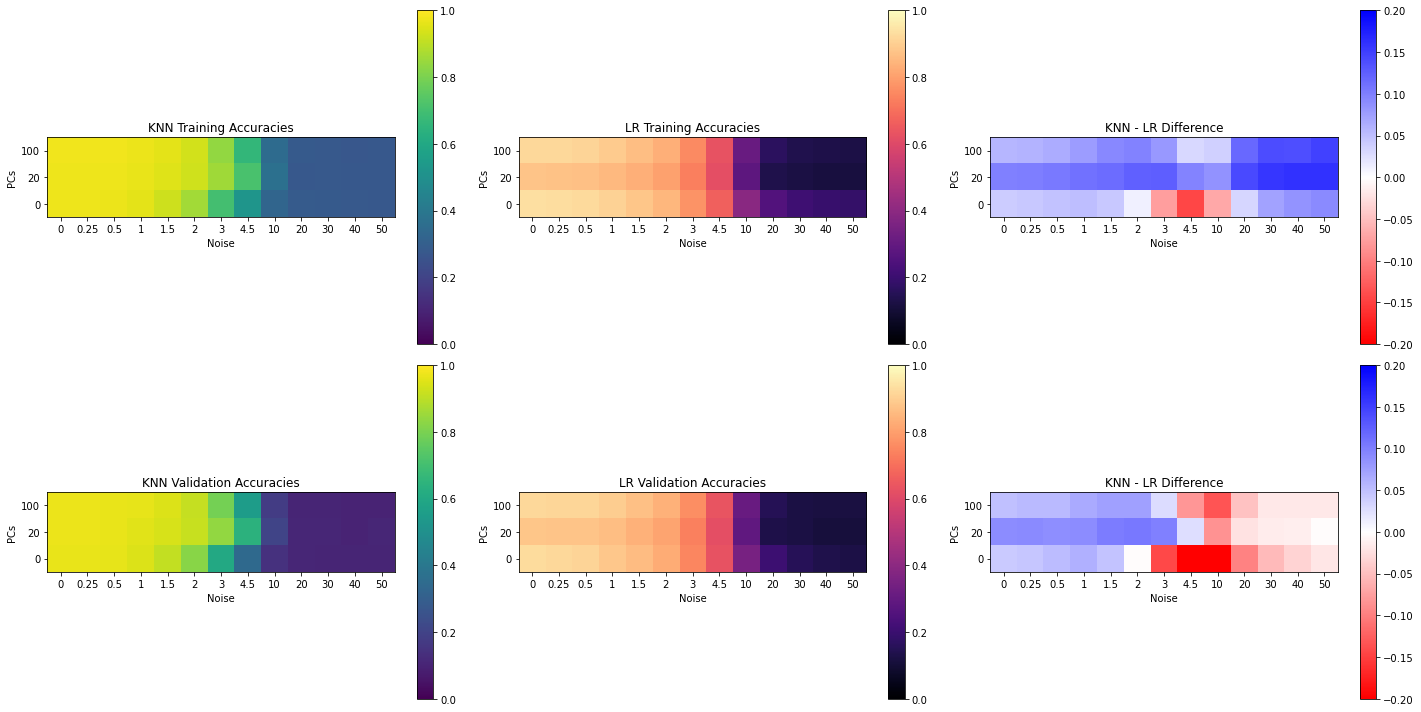

In [97]:
plt.figure(figsize=[20,10])
plt.subplot(231)
plt.imshow(knn_accuracies[:3],vmax=1,vmin=0,cmap='viridis')
plt.title('KNN Training Accuracies')
plt.yticks([0,1,2],[100,20,0])
plt.ylabel('PCs')
plt.xticks(range(13),n_noise)
plt.xlabel('Noise')
plt.colorbar()
plt.subplot(232)
plt.imshow(LR_accuracies[:3],vmax=1,vmin=0,cmap='magma')
plt.title('LR Training Accuracies')
plt.yticks([0,1,2],[100,20,0])
plt.ylabel('PCs')
plt.xticks(range(13),n_noise)
plt.xlabel('Noise')
plt.colorbar()
plt.subplot(233)
plt.imshow(np.array(knn_accuracies[:3])-LR_va_accuracies[:3],vmax=0.2,vmin=-0.2,cmap='bwr_r')
plt.title('KNN - LR Difference')
plt.yticks([0,1,2],[100,20,0])
plt.ylabel('PCs')
plt.xticks(range(13),n_noise)
plt.xlabel('Noise')
plt.colorbar()
plt.subplot(234)
plt.imshow(knn_accuracies[3:],vmax=1,vmin=0,cmap='viridis')
plt.title('KNN Validation Accuracies')
plt.yticks([0,1,2],[100,20,0])
plt.ylabel('PCs')
plt.xticks(range(13),n_noise)
plt.xlabel('Noise')
plt.colorbar()
plt.subplot(235)
plt.imshow(LR_accuracies[3:],vmax=1,vmin=0,cmap='magma')
plt.title('LR Validation Accuracies')
plt.yticks([0,1,2],[100,20,0])
plt.colorbar()
plt.ylabel('PCs')
plt.xticks(range(13),n_noise)
plt.xlabel('Noise')
plt.subplot(236)
plt.imshow(np.array(knn_accuracies[3:])-LR_accuracies[3:],vmax=0.2,vmin=-0.2,cmap='bwr_r')
plt.title('KNN - LR Difference')
plt.yticks([0,1,2],[100,20,0])
plt.ylabel('PCs')
plt.colorbar()
plt.xticks(range(13),n_noise)
plt.xlabel('Noise')
plt.tight_layout()

#### If we look at the plot above at the column on the right the areas of red are regions where the logistical regression (LR) does better than the KNN whereas blue shows areas where the KNN has superior accuracy. 0 PCs in this case means no PCA.

#### We can see that in training the KNN generally has higher scores save for the case with no PCA where the LR does much better in training. The KNN generally has better accuracy for validation when the data has noise levels below three depending on the number of PCs used, while for higher noise the LR is seen to be more robust and also resilient to overfitting.

#### In general the KNN performed better with less PCs (Left) while the LR did not have too much difference depending on the PCs as can be seen in the center plots.

### Confusion Matrices

####  I added a confusion matrices plot function from the class notebooks to the python script for the assignment so that the backend can call a plot and I don't have to get the model back from my script.

Lets look at the confusion matrices of the highest validation score relative to each other. In this case LR having the highest relative accuracy for no PCA with a noise of 10 and no PCA. KNN having the highest relative score for low noise with 20 PCs so lets look at a noise of 2 with 20 PCs as well.

### Noise = 10, npca = 0

Best LR compared to KNN

Noise is 10, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))
The time taken was 86.04652667045593 seconds



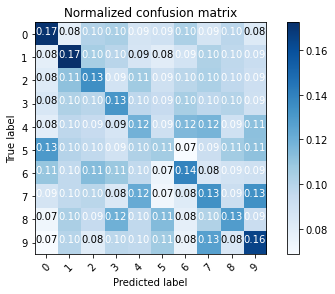

In [13]:
#Get the model to plot a confusion matrix
n_tr, c_noise, n_pca, n_component = 60000, 10, 0, 10

ac_tr, ac_va, ti_tr = return_classification_accuracy(
    inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
    model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=n_component,p=2,conf_matrix=True
)

Noise is 10, number of PCs is 0
Shape of the training, validation data ((60000, 784), (10000, 784))


/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The time taken was 8.389922618865967 seconds



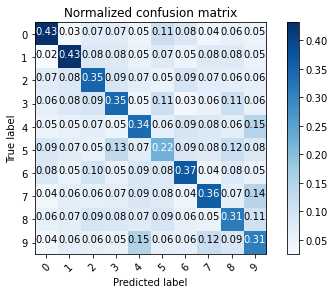

In [14]:
ac_tr, ac_va, ti_tr = return_classification_accuracy(
    inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
    model=LogisticRegression,PCA_comp=n_pca,penalty='l2',verbose=0,conf_matrix=True
)

#### The confusion matrix for the KNN shows that the model has almost no predictive power with most of the entries in the matrix around 0.1 indicating that there is little more guessing going on, and all of the entries being between 0.08 and 0.17 in the normalized matrix indicating poor predictive power for all digits.

#### For the LR the confusion shows that the model does not have great predictive power with substantial misclasification, however the model is doing considerably better on all classes with true classifications in almost all cases double that of the KNN.

#### This demonstrates LRs robustness to noise in the dataset making it a more suitable model for very noisy data in this case.

### Noise = 2, npca = 20

Best KNN relative to LR

Noise is 2, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 61.418033838272095 seconds



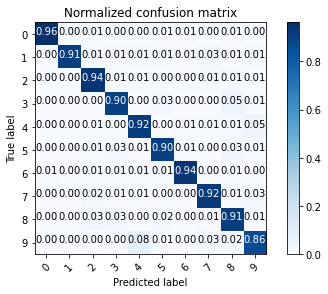

In [15]:
#Get the model to plot a confusion matrix
n_tr, c_noise, n_pca, n_component = 60000, 2, 20, 10

ac_tr, ac_va, ti_tr = return_classification_accuracy(
    inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
    model=KNeighborsClassifier,PCA_comp=n_pca,n_neighbors=n_component,p=2,conf_matrix=True
)

Noise is 2, number of PCs is 20
Shape of the training, validation data ((60000, 20), (10000, 20))
The time taken was 1.3474628925323486 seconds



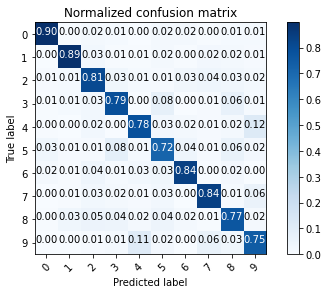

In [16]:
ac_tr, ac_va, ti_tr = return_classification_accuracy(
    inp_tr[:n_tr], tar_tr[:n_tr], inp_va, tar_va, c_noise,
    model=LogisticRegression,PCA_comp=n_pca,penalty='l2',verbose=0,conf_matrix=True
)

#### The confusion matrix for the KNN shows that the model has great predictive power in a situation that is quite challenging, noise of twice the amplitude of the data is a lot of noise and 20 PCs is only accounting for about 60% of the variance in the data but the KNN still shows accuracy comparable to the best accuracy achievable by the LR which is fairly astonishing.

#### The confusion matrix of the LR shows good performance with some of the easier digits like 0 and 1 showing competitive results to the KNN but digits like 5 and 9 show only about 0.75 true predictions. This shows that LR although more robust to noise generally in that it does not overfit as readily, especially with PCA, cannot achieve the performance that KNN. And cannot match the performance of KNN in the case of MNIST with small amounts of added noise andfew PC components.
